In [41]:
###PLEASE NOTE###
#Some of the following graphs were generated after the merging our two initial datasets (df_pre2021 and df_2021), and cleaning
#the obtained table "df_all".
#In order to visualize the below graphs properly and without any issues, please run the code in folder "03_preProcessing" prior running the below.


In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_2021 = pd.read_csv("world-happiness-report-2021.csv")
df_pre2021 = pd.read_csv('world-happiness-report.csv')

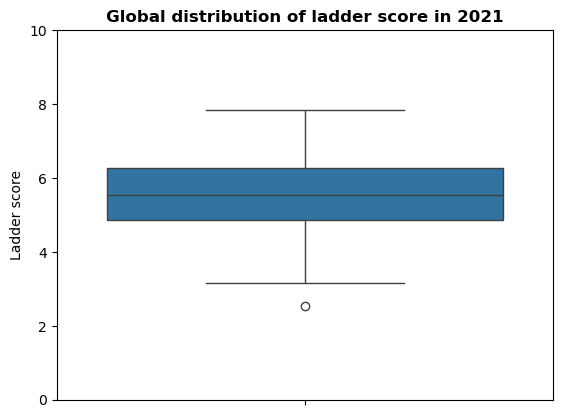

In [97]:
#Observing the global distribution of the ladder score in 2021:

sns.boxplot(y='Ladder score', data=df_2021)
plt.ylim(0, 10) 
plt.title("Global distribution of ladder score in 2021", fontweight='bold');

#The distribution of the ladder score in 2021 appears symmetric with only one extreme value, indicating a balanced dataset
#that fairly represents the well-being variable.

In [99]:
#Identifying the top 10 countries with the bast ladder score in 2021:

print("\33[1mTop 10 countries with the best ladder score in 2021:\33[0m")

df_2021_sorted = df_2021.sort_values(by='Ladder score', ascending = False)
display(df_2021_sorted.head(10))
df_top10_2021 = df_2021_sorted.head(10)


Top 10 countries with the best ladder score in 2021:


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


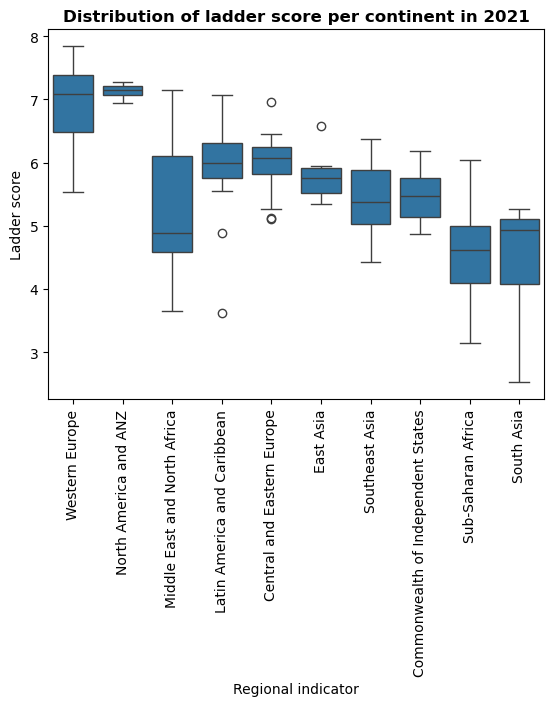

In [101]:
#Plotting the ladder score distribution per continent for year 2021:

sns.boxplot(y='Ladder score', x='Regional indicator', data=df_2021_sorted)
plt.xticks(rotation=90);
plt.title('Distribution of ladder score per continent in 2021', fontweight='bold');

#We can observe that the most heterogeneous distribution goes to Middle Eeast and North Africa with imbalanced score values spreading between 4.5 and 6. 
#Conversely, the most homogenous distribution goes to North America and ANZ, showing more balances data with highest values roughly between 7 and 7.2. 
#Additionally, Western Europe is also showing high scores but due to a more heterogeneous ditribution, the average score is slightly lower than North 
#America and ANZ, as shown in the below bar chart.
#Finally, we can observe some extreme values in Latin America, Central and Eastern Europe and East Asia regions. It could be interesting here to
#identify which countries are behind these values.

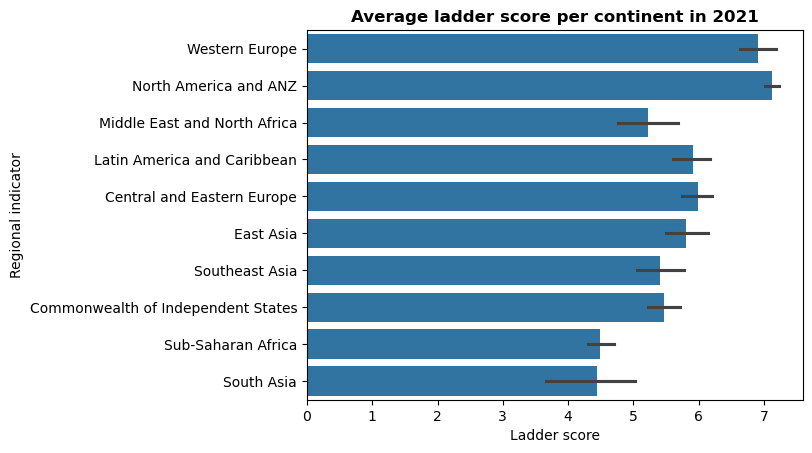

In [103]:
#Plotting the average ladder score per continent for year 2021:

df_2021_sorted = df_2021.sort_values(by='Ladder score', ascending = False)
sns.barplot(y='Regional indicator', x='Ladder score', data=df_2021_sorted)
plt.title('Average ladder score per continent in 2021',fontweight='bold');

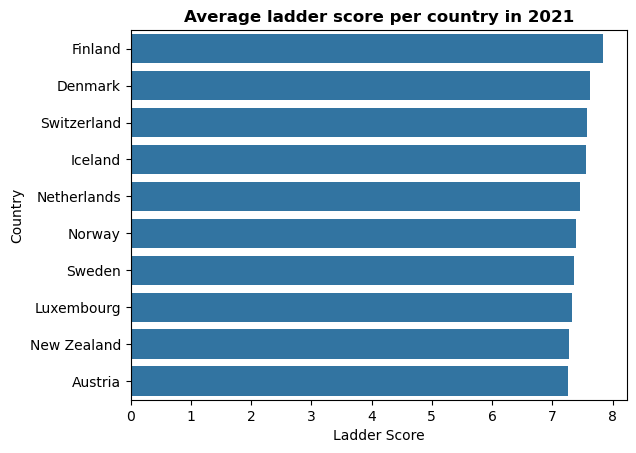

In [105]:
#Plotting the top 10 happiest countries:

df_2021_sorted = df_2021.sort_values(by='Ladder score', ascending = False)
df_2021_top10 = df_2021_sorted.head(10)
sns.barplot(y='Country name', x='Ladder score', data=df_2021_top10)
plt.title('Average ladder score per country in 2021',fontweight='bold');
plt.xlabel('Ladder Score')
plt.ylabel('Country');

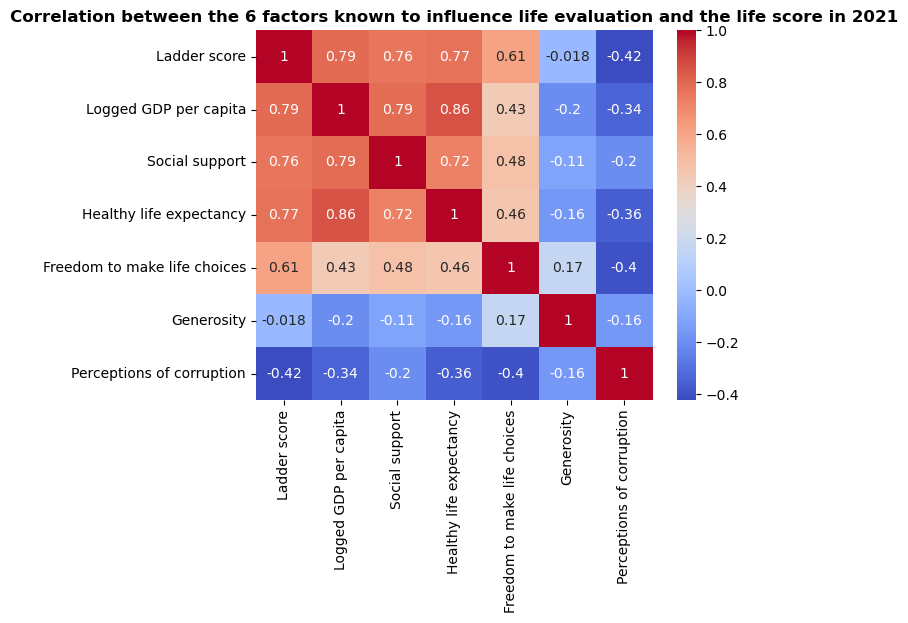

In [107]:
#Investigating on the relationship of the 6 factors included in the study, with the ladder score in 2021::

factors = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices','Generosity', 'Perceptions of corruption']
df_fact = df_2021[factors]

corr = df_fact.corr()

plt.title("Correlation between the 6 factors known to influence life evaluation and the life score in 2021", fontweight='bold');

sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.show()

#Logged GDP per capita and healthy life expectancy are showing the highest values on the correlation matrix in relation to the ladder score, meaning
#that those are the ones influencing the most the life score.

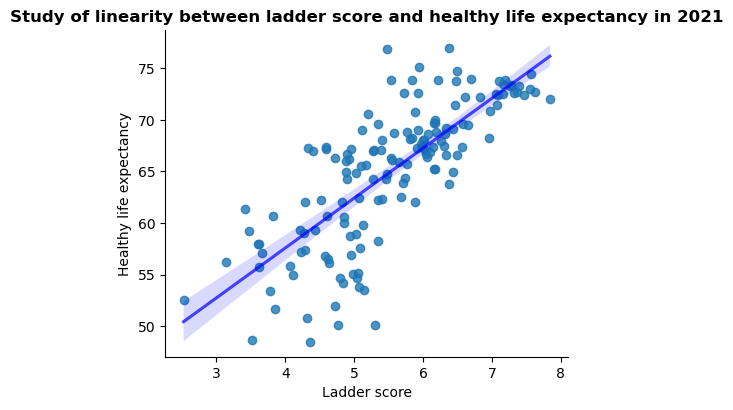

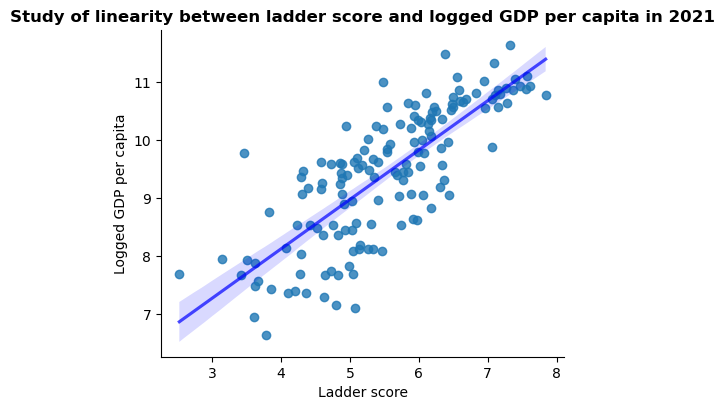

In [109]:
#Based on the previous heatmap, the below scatter plots are displayed to show the linearity between ladder score and the two most influencing factors.
#In both cases, the relationship seems to be linear, confirming that the ladder score is influenced by both factor.

sns.lmplot(x="Ladder score", y="Healthy life expectancy", data=df_2021, height=4, aspect=1.2, line_kws={'color': 'blue', 'alpha': 0.7})
plt.title("Study of linearity between ladder score and healthy life expectancy in 2021", fontweight='bold');

sns.lmplot(x="Ladder score", y="Logged GDP per capita",data=df_2021, height=4, aspect=1.2, line_kws={'color': 'blue', 'alpha': 0.7});
plt.title("Study of linearity between ladder score and logged GDP per capita in 2021", fontweight='bold');


In [111]:
#Pearson test to check for linearity strength between ladder_score and healthy life expectation:

#H0:ladder_score and healthy life expectation are not correlated
#H1:ladder_score and healthy life expectation are correlated

from scipy.stats import pearsonr
print("Ladder score vs Healthy life expectancy -  p-value: ", pearsonr(x = df_2021["Ladder score"], y = df_2021["Healthy life expectancy"])[1])
print("Ladder score vs Healthy life expectancy - coefficient: ", pearsonr(x = df_2021["Ladder score"], y = df_2021["Healthy life expectancy"])[0])

#Conclusion: p-value < 0.05, shows strong correlation between the two variables. Additionnally, the high values observed for the coefficient of
#correlation indicates a strong linear relationship.

Ladder score vs Healthy life expectancy -  p-value:  2.9617212615354645e-30
Ladder score vs Healthy life expectancy - coefficient:  0.7680994550105207


In [113]:
#Pearson test to check for linearity strength between ladder_score and logged GDP per capita:

#H0: ladder_score and logged GDP per capita are not correlated
#H1:ladder_score and logged GDP per capita are correlated

from scipy.stats import pearsonr
print("Ladder score vs Logged_GDP per capita - p-value: ", pearsonr(x = df_2021["Ladder score"], y = df_2021["Logged GDP per capita"])[1])
print("Ladder score vs Logged GDP per capita - coefficient: ", pearsonr(x = df_2021["Ladder score"], y = df_2021["Logged GDP per capita"])[0])

#Conclusion: p-value < 0.05, shows strong correlation between the two variables. Additionnally, the high values observed for the coefficient of
#correlation indicates a strong linear relationship.

Ladder score vs Logged_GDP per capita - p-value:  5.228089093895771e-33
Ladder score vs Logged GDP per capita - coefficient:  0.7897596965098936


In [115]:
import warnings
warnings.filterwarnings("ignore")

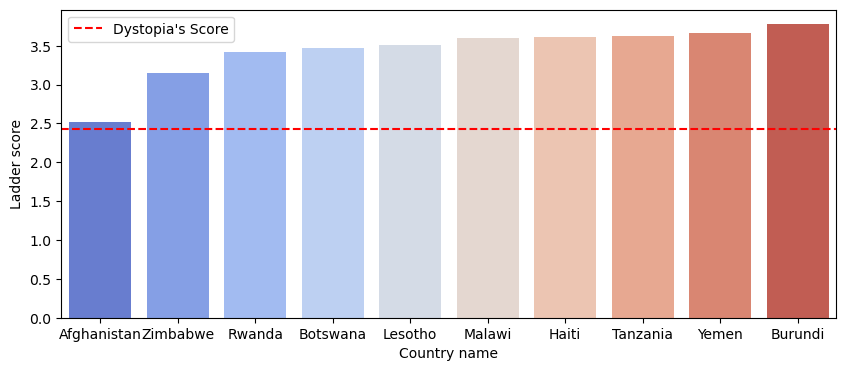

In [117]:
# The 10 countries with the lowest Ladder score value will be compared to the average Ladder score in Dystopia 
#(set to 2.43, represented by the red line).As we can see, the 10 least happy countries have a Ladder score
#that is very close to the score of Dystopia.

worst_10 = df_2021.sort_values(by='Ladder score', ascending=True).head(10)
dystopia_score = 2.43

plt.figure(figsize=(10, 4))

sns.barplot(data=worst_10, x='Country name', y='Ladder score', palette="coolwarm")
plt.axhline(y=dystopia_score, color='r', linestyle='--', label="Dystopia's Score")
plt.legend(title="");

In [119]:
df_all_notencoded = pd.read_csv("df_all_notencoded.csv")
df_all_notencoded.head()

,Regional_indicator,Country_name,year,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,South Asia,Afghanistan,2019,2.375,0.211849,0.420,0.448661,0.394,0.219748,0.924
1,South Asia,Afghanistan,2021,2.523,0.211450,0.463,0.450737,0.382,0.225557,0.924
2,South Asia,Afghanistan,2017,2.662,0.211849,0.491,0.457589,0.427,0.207164,0.954
3,South Asia,Afghanistan,2018,2.694,0.210852,0.508,0.453125,0.374,0.233301,0.928
4,South Asia,Afghanistan,2014,3.131,0.216038,0.526,0.459375,0.509,0.424976,0.871


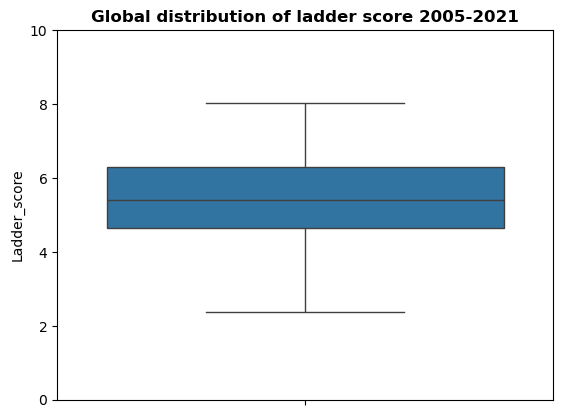

In [121]:
#Observing the global distribution of the ladder score between 2005 and 2021:

sns.boxplot(y='Ladder_score', data=df_all_notencoded)
plt.ylim(0, 10) 
plt.title("Global distribution of ladder score 2005-2021", fontweight='bold');

#The global distribution of the ladder score is quite symmetric, meaning that the data are balanced. 
#This suggests that there is a relatively equal representation of the ladder score values across the dataset.

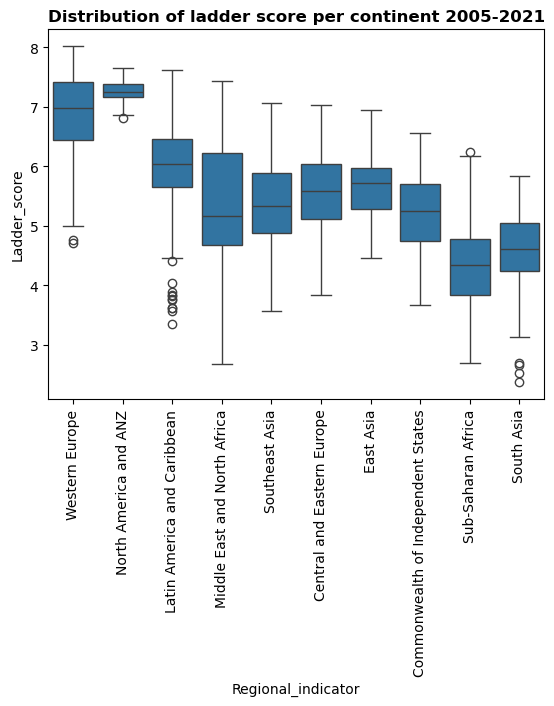

In [123]:
#Observing the distribution of the ladder score per continent (2005-2021):

df_all_notencoded_sorted = df_all_notencoded.sort_values(by='Ladder_score', ascending = False)
sns.boxplot(y='Ladder_score', x='Regional_indicator', data=df_all_notencoded_sorted)
plt.xticks(rotation=90);
plt.title('Distribution of ladder score per continent 2005-2021', fontweight='bold');

#Similarly to previous observation for year 2021, we can see that the most heterogeneous distribution goes to Middle Eeast and North Africa 
#with score values spreading roughly between 4.5 and 6. 
#Conversely, the most homogenous distribution goes to North America and ANZ, with highest score values roughly between 7 and 7.2. Additionally, 
#Western Europe is also showing high scores but due to a most heterogeneous ditribution (~6.6 - 7.4), the average score is slightly lower than North 
#America and ANZ, which is consistent with the above bar chart.
#Finally, we can observe some extreme values in Latin America, Central and Eastern Europe and East Asia regions. It could be interesting here to
#identify which countries are behind these values.

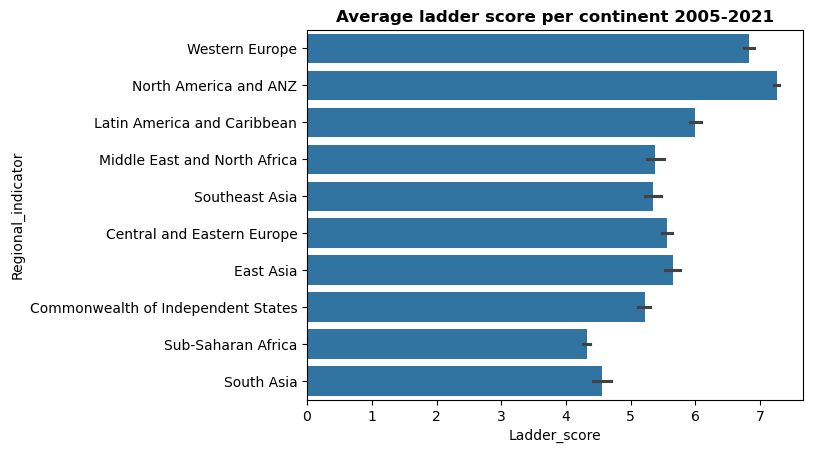

In [125]:
#Analysing average ladder score per continent (2005-2021):

sns.barplot(y='Regional_indicator', x='Ladder_score', data=df_all_notencoded_sorted)
plt.title('Average ladder score per continent 2005-2021',fontweight='bold');

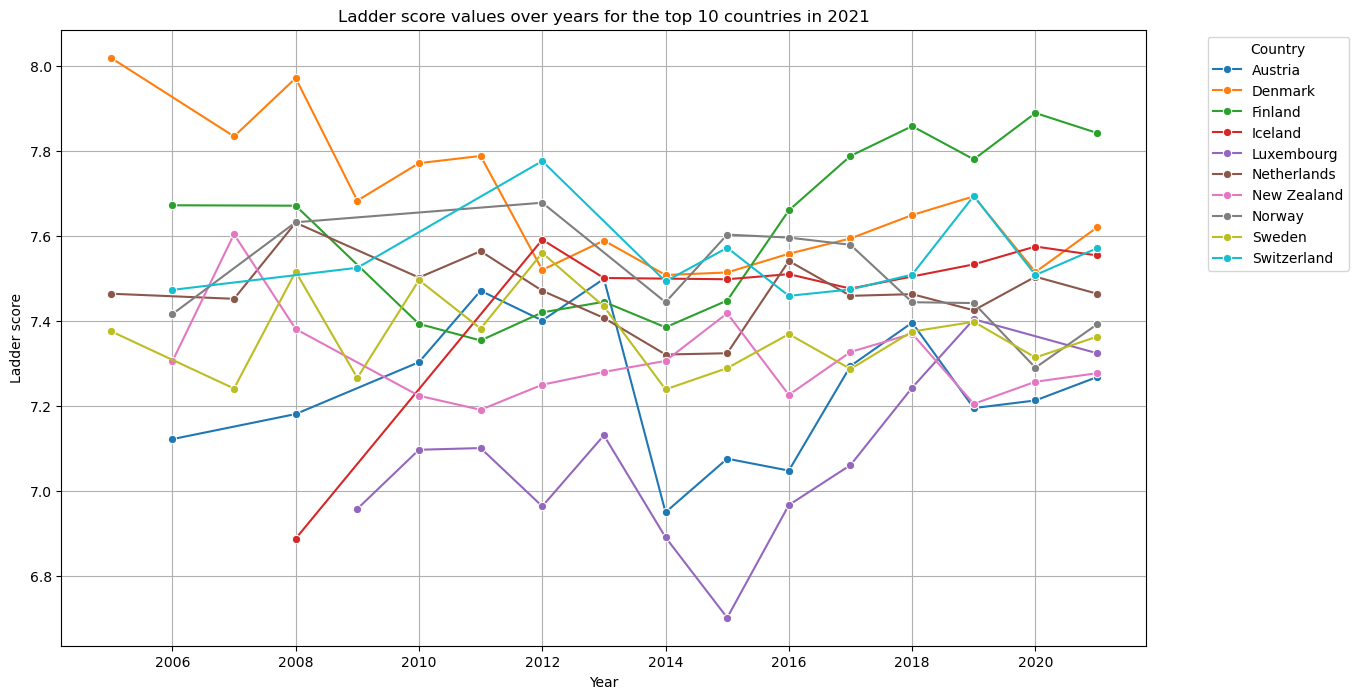

In [127]:
#Looking at historical trend, to get a comprehensive overivew of the ladder score evolution over time until 2021: 

# The following code sorts the top 10 countries with the best Life Ladder score.
# This is done to prepare the data for the historical line analysis

df_2021 = df_all_notencoded[df_all_notencoded["year"] == 2021]
top_10 = df_2021.sort_values(by='Ladder_score', ascending=False).head(10)
top_countries = top_10["Country_name"].tolist()
df_top_10 = df_all_notencoded[df_all_notencoded['Country_name'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_top_10, x='year', y='Ladder_score', hue='Country_name', marker='o')

plt.title('Ladder score values over years for the top 10 countries in 2021')
plt.xlabel('Year')
plt.ylabel('Ladder score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

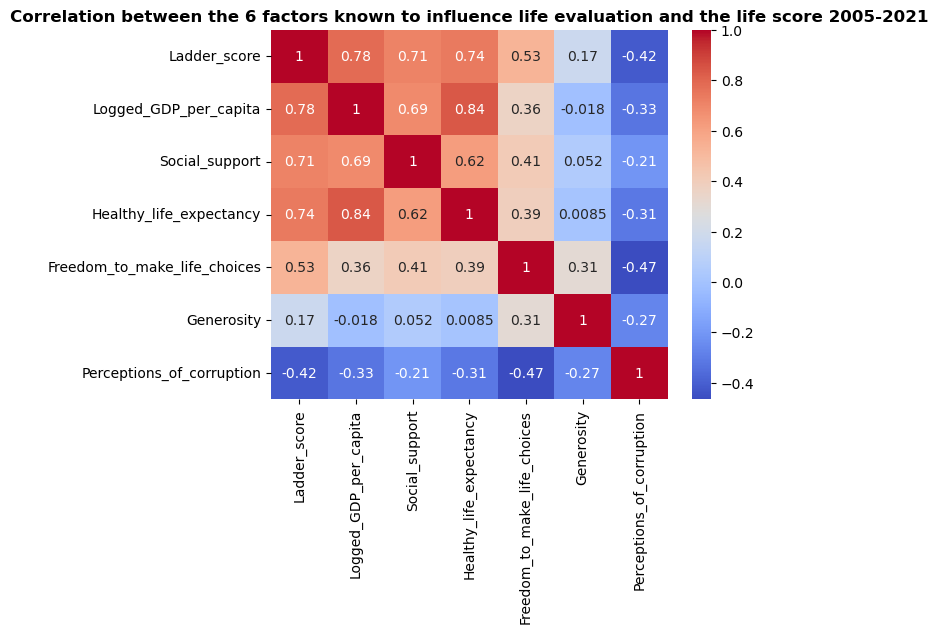

In [129]:
#Investigating on the relationship of the 6 factors included in the study, with the ladder score:

factors = ['Ladder_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices','Generosity', 'Perceptions_of_corruption']
df_fact = df_all_notencoded[factors]

corr = df_fact.corr()

plt.title("Correlation between the 6 factors known to influence life evaluation and the life score 2005-2021", fontweight='bold');

sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.show()

#Similarly to previous observations on the 2021 dataset, Logged GDP per capita and healthy life expectancy are showing the highest values 
#on the correlation matrix in relation to the ladder score, meaning that those are the ones influencing the most the life score.

In [131]:
#Pearson test to check for linearity strength between ladder_score and healthy life expectation

#H0:ladder_score and healthy life expectation are not correlated
#H1:ladder_score and healthy life expectation are correlated

from scipy.stats import pearsonr
print("Ladder score vs Healthy life expectancy -  p-value: ", pearsonr(x = df_all_notencoded["Ladder_score"], y = df_all_notencoded["Healthy_life_expectancy"])[1])
print("Ladder score vs Healthy life expectancy - coefficient: ", pearsonr(x = df_all_notencoded["Ladder_score"], y = df_all_notencoded["Healthy_life_expectancy"])[0])

#Conclusion: here the p-value is 0, indicating a strong evidence against the null hypothesis (H0), meaning that  the observed correlation
#is highly unlikely to have occurred randomly and hence there is a very strong linear relationship between the variables. This is futher confirmed
#with the quite high correlation coefficient of 0.74.

Ladder score vs Healthy life expectancy -  p-value:  0.0
Ladder score vs Healthy life expectancy - coefficient:  0.7422905672581914


In [133]:
#Pearson test to check for linearity strength between ladder_score and logged GDP per capita

#H0: ladder_score and logged GDP per capita are not correlated
#H1:ladder_score and logged GDP per capita are correlated

from scipy.stats import pearsonr
print("Ladder score vs Logged_GDP per capita - p-value: ", pearsonr(x = df_all_notencoded["Ladder_score"], y = df_all_notencoded["Logged_GDP_per_capita"])[1])
print("Ladder score vs Logged GDP per capita - coefficient: ", pearsonr(x = df_all_notencoded["Ladder_score"], y = df_all_notencoded["Logged_GDP_per_capita"])[0])

#Conclusion: again, the p-value is 0, indicating a strong evidence against the null hypothesis (H0), meaning that  the observed correlation
#is highly unlikely to have occurred randomly and hence there is a very strong linear relationship between the variables. This is futher confirmed
#with the quite high correlation coefficient of 0.78.

Ladder score vs Logged_GDP per capita - p-value:  0.0
Ladder score vs Logged GDP per capita - coefficient:  0.7836719272937986


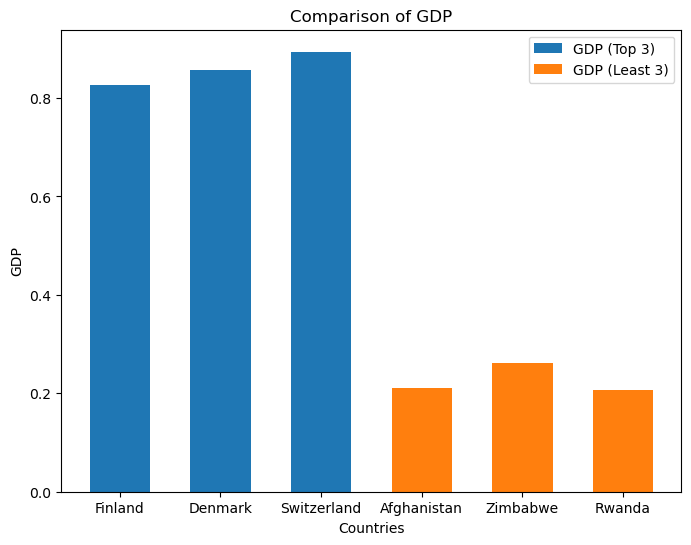

In [135]:
#Comparison of economic rates within the 3 least and most happy countries in 2021:

list_2021 = df_all_notencoded[df_all_notencoded["year"] == 2021]
top_3 = list_2021.sort_values(by='Ladder_score', ascending=False).head(3)
least_3 = list_2021.sort_values(by='Ladder_score', ascending=True).head(3)

barWidth = 0.6
plt.figure(figsize=(8, 6))
plt.bar(top_3["Country_name"], top_3["Logged_GDP_per_capita"], width = barWidth, label='GDP (Top 3)')
plt.bar(least_3["Country_name"], least_3["Logged_GDP_per_capita"], width = barWidth, label='GDP (Least 3)')

plt.xlabel('Countries')
plt.ylabel('GDP')
plt.title('Comparison of GDP')
plt.legend();


# The graph shows that the GPD among the 3 countries at the top of Ladder Score,
# is almost two times as high as the GPD score of the countries at the bottom of the Ladder Score.

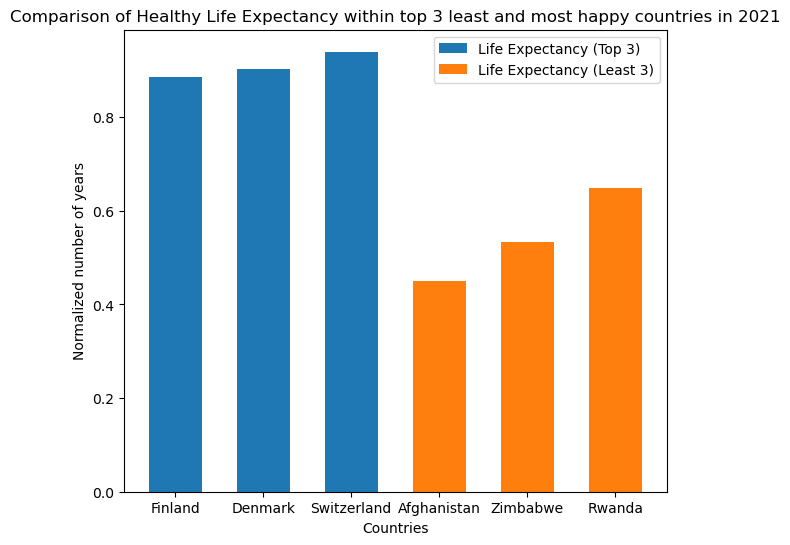

In [137]:
#Comparison of healthy life expectancy within the 3 least and most happy countries:

barWidth = 0.6
plt.figure(figsize=(7, 6))
plt.bar(top_3["Country_name"], top_3["Healthy_life_expectancy"], width = barWidth, label='Life Expectancy (Top 3)')
plt.bar(least_3["Country_name"], least_3["Healthy_life_expectancy"], width = barWidth, label='Life Expectancy (Least 3)')

plt.xlabel('Countries')
plt.ylabel('Normalized number of years')
plt.title('Comparison of Healthy Life Expectancy within top 3 least and most happy countries in 2021')
plt.legend();

# The graph shows that the Healthy Life Expectancy among the 3 countries at the top of Ladder Score,
# is (on average) higher by 0.25 points than the countries at the bottom of the Ladder Score.